# Effect of September-11 Terrorist Attack on Hate Crimes Against Muslims in the United Stateds
#### Course: Data Bootcamp  
#### Report Author: Muaz Ahmad  
#### Report Date: May 12, 2017  
####  New York University  
#### Leonard N. Stern School of Business  

![Alt text](hc_image.jpeg)

Image Source = [http://www.huffingtonpost.com/entry/hate-crimes-muslims-since-911_us_57e00644e4b04a1497b59970](http://www.huffingtonpost.com/entry/hate-crimes-muslims-since-911_us_57e00644e4b04a1497b59970)

# Research Question:

### Main Research Question:
#### Q: Did September-11 terrorist attack have an impact on hate crimes against Muslims? How much and what impact did the incident have?

### Analysis Questions: I will be using the data to answer the following questions. Answers to the following questions will be used to answer the main research question.

1. How have the hate crimes against Muslims changed in terms of number of incidents per year?
1. Did September-11 Terrorist Attack had an impact on the hate crimes against Muslims? If so, how much impact did September-11 Terrorist Attack had?
2. How have the hate crimes against All religion changed in terms of number of incidents per year?
3. What percentage of hate crimes motivated by religion identity target Muslims every year?
3. On average what percentages of attacks motivated by religion targetted Muslims, before and after the September-11 Terrorist Attack?

# Data Source

The project focuses on the affect of 9/11 incident on the change in the hate crimes against Muslims in the United States. The data used for the project has been collected as [Hate Crime Statistics](https://ucr.fbi.gov/hate-crime) through the [Uniform Crime Reporting (UCR) Program](https://ucr.fbi.gov/) of [Federal Bureau of Investigation (FBI)](https://www.fbi.gov/). The data is avialable on from FBI's website, where the data is reported on an yearly basis.  

###### The data is available for years [1995 to 2015](https://ucr.fbi.gov/hate-crime), except 2009.  

#### For each year: The data has been divided into different tables, based on the following aspects:
* Incidents and Offenses
* Victims
* Offenders
* Location Type
* Hate Crime by Jurisdication

###### The projects uses the data categorised based on Incidents and Offenses, since the data is categorised into different types of hate crimes including Anti-Religion. The project utelises the data from year 1995-2015.

#### Limitations of the Data:
* The data does not include the statistics for Hawaii. The data is not reported for Hawaii in the records.
* The FBI collects data from independent law-enforcing agencies in different towns, cities, counties, metropolitan areas and university areas. Therefore, the data is contingent upon their reporting.
* There is no data available for [2009](https://ucr.fbi.gov/hate-crime/2009).

# Preliminaries

In [31]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import requests
from bs4 import BeautifulSoup
%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())
plt.style.use('ggplot')

Python version:  3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.18.1
Today:  2017-05-12


# Data Import (2005 - 2015)

Files for years 2005-2015 are available in [excel format](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html). The files are downloaded into the working directory, and then imported using [pandas library](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html). For the above-mentioned years,the data is available in [different tables](https://ucr.fbi.gov/hate-crime/2015/topic-pages/incidentsandoffenses_final) and these tables categorise the data differently. We have used Table1, since it categorises the hate criimes against religion into different religions, which is most appropriate for this project. For example, for year 2015, we will get Table 1 from the [source](https://ucr.fbi.gov/hate-crime/2015/tables-and-data-declarations/1tabledatadecpdf).

# 2015 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2015/tables-and-data-declarations/1tabledatadecpdf](https://ucr.fbi.gov/hate-crime/2015/tables-and-data-declarations/1tabledatadecpdf)

The file is saved locally as "table1_2015.xls"

In [32]:
url = 'table1_2015.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2015 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E", headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2015 = data_2015[12:27]
#columns = ['Incidents','Offenses', 'Victims','Known Offenders']
#original_2015 = religion_2015.copy(deep=True)
#for col in columns:
 #   new_val = religion_2015.iloc[5][col] + religion_2015[col][7:14].sum()
      #print(new_val)
    #religion_2015 = religion_2015.set_value('Anti-Other Religion',col,new_val)
    #religion_2015.ix['Anti-Other Religion',col] = new_val
religion_2015

,Motivation,Incidents,Offenses,Victims,Known Offenders
12,Religion:,1244,1354,1402,809
13,Anti-Jewish,664,695,731,387
14,Anti-Catholic,53,59,60,29
15,Anti-Protestant,37,47,48,18
16,Anti-Islamic (Muslim),257,301,307,228
17,Anti-Other Religion,96,104,107,53
18,"Anti-Multiple Religions, Group",51,57,58,30
19,Anti-Mormon,8,8,8,6
20,Anti-Jehovah's Witness,1,1,1,0
21,"Anti-Eastern Orthodox (Russian, Greek, Other)",48,50,50,36


# 2014 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2014/tables/table-1](https://ucr.fbi.gov/hate-crime/2014/tables/table-1)

The file is saved locally as "table1_2014.xls"

In [33]:
url = 'table1_2014.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2014 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2014 = data_2014[9:17]

# 2013 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2013/tables/1tabledatadecpdf/table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2013.xls](https://ucr.fbi.gov/hate-crime/2013/tables/1tabledatadecpdf/table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2013.xls)

The file is saved locally as "table1_2013.xls"

In [34]:
url = 'table1_2013.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2013 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2013 = data_2013[9:17]

# 2012 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2012/tables-and-data-declarations/1tabledatadecpdf/table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2012.xls](https://ucr.fbi.gov/hate-crime/2012/tables-and-data-declarations/1tabledatadecpdf/table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2012.xls)

The file is saved locally as "table1_2012.xls"

In [35]:
url = 'table1_2012.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2012 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2012 = data_2012[8:16]

# 2011 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2011/tables/table-1](https://ucr.fbi.gov/hate-crime/2011/tables/table-1)

The file is saved locally as "table1_2011.xls"

In [36]:
url = 'table1_2011.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2011 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2011 = data_2011[8:16]

# 2010 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2010/tables/table-1-incidents-offenses-victims-and-known-offenders-by-bias-motivation-2010.xls](https://ucr.fbi.gov/hate-crime/2010/tables/table-1-incidents-offenses-victims-and-known-offenders-by-bias-motivation-2010.xls)

The file is saved locally as "table1_2010.xls"

In [37]:
url = 'table1_2010.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2010 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2010 = data_2010[7:15]

# 2009 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2010/tables/table-1-incidents-offenses-victims-and-known-offenders-by-bias-motivation-2010.xls](https://ucr.fbi.gov/hate-crime/2010/tables/table-1-incidents-offenses-victims-and-known-offenders-by-bias-motivation-2010.xls)

The file is saved locally as "table1_2010.xls"

# 2008 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2008](https://ucr.fbi.gov/hate-crime/2008)

The file is saved locally as "table1_2008.xls"

In [38]:
url = 'table1_2008.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2008 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2008 = data_2008[7:15]

# 2007 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2007](https://ucr.fbi.gov/hate-crime/2007)

The file is saved locally as "table1_2007.xls"

In [39]:
url = 'table1_2007.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2007 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2007 = data_2007[7:15]

# 2006 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2006](https://ucr.fbi.gov/hate-crime/2006)

The file is saved locally as "table1_2006.xls"

In [40]:
url = 'table1_2006.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2006 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2006 = data_2006[7:15]

# 2005 Data
Download Source = [https://ucr.fbi.gov/hate-crime/2005](https://ucr.fbi.gov/hate-crime/2005)

The file is saved locally as "table1_2005.xls"

In [41]:
url = 'table1_2005.xls'
headers = ['Incidents','Offenses','Victims1','Known offenders2']
data_2005 = pd.read_excel(url, skiprows=3, skipfooter=3, parse_cols="A,B,C,D,E",headers = None, names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])
religion_2005 = data_2005[7:15]

# Data Web Scraping: 2004 

Download Source = [https://www2.fbi.gov/ucr/hc2004/hctable1.htm](https://www2.fbi.gov/ucr/hc2004/hctable1.htm)

The data for 2004 is available as a HTML table on the website. 

##### Following steps are followed in data collection for 2004:

1. Request the content of the source page using python [request libray](http://docs.python-requests.org/en/master/).
2. Format the import webpage contect using python [BeautifulSoup libray's](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) 'html.parser'.
3. Since the relevant data is available in html table, loop through the relevant table rows, and extract the data values.
4. For each row, write the extracted data values into a local file, named 'source_2004.txt'

In [42]:
target = 'source_2004.txt'
target = open(target, "w")
url = "https://www2.fbi.gov/ucr/hc2004/hctable1.htm"
data_2004 = requests.get(url)
data_2004_soup = BeautifulSoup(data_2004.content, 'html.parser')
data_2004_soup
religion_part = data_2004_soup.find_all('tr')
for row_number in range(9,17):
    row = religion_part[row_number]
    tmp_string = ''
    table_header = row.find('th')
    table_values = row.find_all('td')
    tmp_string += table_header.text + ' '
    for tb in table_values:
        tmp_string += tb.text + ' '
    tmp_string = tmp_string[:-1].replace('\n','') + '\n'
    target.write(tmp_string)
target.close()

# Data Import 1996 - 2004

Files for yeas 1995-2003, Table 1s are available within pdf reports, and will require a seperate importation technique as compared to the excel files. The relevant data is manually copied from each pdf file seperate, and stored into seperte local files.  

##### Steps for Data Collection using example of 2003: 

1. [The pdf data report](https://ucr.fbi.gov/hate-crime/2003) is available on FBI's website.
2. Copy the relevant table rows representing the religion section from Table 1 in the report.
3. Paste the copied data into a local file named 'source_2003.txt'
4. Save the file.
5. Repeat the same steps for year 1996-2002 too.

Once the Data has been saved locally, it is cleaned and converted into .csv format, such that it can be directly imported into DataFrames afterwards.  

##### Steps for cleaing and converting the files to .csv format, and loading them in pandas DataFrames, using year 2003 as example:
1. Open the source file e.g source_2003
2. Open the target file e.g table1_2003.csv
3. Loop through each line in the source file:  
    * Remove the endline character i.e '\n'
    * Remove all the commas ',' from the line.
    * Split the line into an array, using empty space as split character.
    * Check if the number of array elements are greater than. If so, array[:-4] are part of the index in the table: join these elements into one element.
    * join the resulting elemets into a string using ',' as join character, and ending the string with newline character '\n'.
    * write the resutling string to target file.
4. Close the target and source files.
5. Use pandas_readcsv(filename) method to read the .csv file into DataFrames. Set DataFrame headers to ["Motivation","Incidents","Offenses","Victims","Known Offenders"]. Name the returned DataFrame as religion_2003.
6. Save religion_2003 to all_years array of DataFrames.
5. Loop through the years 1996 to 2003 and repeat the same steps.

In [45]:
# Global Variables
all_years = [] # list of all the DataFrames.
sourcenames = ["source_"+str(year)+".txt" for year in range(1996,2005)] # list of source files names for 1996-2003, to be converted to .csv
targetnames = ["table1_"+str(year)+".csv" for year in range(1996,2005)] # List of name of all .csv files, to be imported in DataFrames
datanames = ["religion_"+str(year) for year in range(1996,2005)] # List of name of all dataframes, to be created e.g religion_1998,religion1999

In [46]:
'''
Steps for cleaing and converting the files to .csv format, 
and loading them in pandas DataFrames, using year 2003 as example:
'''
# Loop through the years 1996 to 2003 and repeat the same steps.
for i in range(9):
    
    source = sourcenames[i]
    target = targetnames[i]
    
    try:
        #Open the source file e.g source_2003
        source = open(source,"r",)
    except:
        print("Could not open the source file")
    else:
        # Open the target file e.g table1_2003.csv
        target = open(target, "w")
        lines = source.readlines();
        rows = len(lines)
        cols = 5
        
        # Loop through each line in the source file:
        for line in lines:
            # Remove the endline character i.e '\n'
            line = line.replace('\n','')

            # Remove all the commas ',' from the line.
            line = line.replace(",","")
            
            # Split the line into an array, using empty space as split character
            line_elements= line.split(' ')
            
            # Check if the number of array elements are greater than. If so, array[:-4] are part of the index in the table: join these elements into one element.
            if len(line_elements) > 5:
                # join the resulting elemets into a string using ',' as join character, and ending the string with newline character '\n'.
                new_line = " ".join(line_elements[:-4]) + ',' + ','.join(line_elements[-4:]) + '\n'
            else:
                # join the resulting elemets into a string using ',' as join character, and ending the string with newline character '\n'.
                new_line = ','.join(line_elements) + '\n'
            # write the resutling string to target file.
            target.write(new_line)
    
    # Close the target and source files.
    source.close()
    target.close()
    
    url = targetnames[i]
    
    # Use pandas_readcsv(filename) method to read the .csv file into DataFrames. Set DataFrame headers to ["Motivation","Incidents","Offenses","Victims","Known Offenders"]. Name the returned DataFrame as religion_2003.
    exec('%s = pd.read_csv(url, engine = "python", names = ["Motivation","Incidents","Offenses","Victims","Known Offenders"])' % (datanames[i]))
    
    # Save religion_2003 to all_years array of DataFrames.
    exec('all_years.append(%s)' % (datanames[i]))

In [47]:
# adding DataFrames for years 2005-2015 excluding 2009 into the all_years list
all_years.extend([religion_2005,religion_2006,religion_2007,religion_2008,religion_2010,religion_2011,religion_2012,religion_2013,religion_2014])

In [48]:
print('Variable dtypes:\n', religion_2000.dtypes, sep='')

Variable dtypes:
Motivation         object
Incidents           int64
Offenses            int64
Victims             int64
Known Offenders     int64
dtype: object


In [49]:
religion_1996
rel = religion_1996['Motivation']
rel

0                        Religion:
1                      Anti-Jewish
2                    Anti-Catholic
3                  Anti-Protestant
4                     Anti-Islamic
5       Anti-Other Religious Group
6       Anti-Multi-Religious Group
7    Anti-Atheism/Agnosticism/etc.
Name: Motivation, dtype: object

# DataFrame Description for a particular year
#### Headers:
1. Motivation: The Motivation behind the hate crime. Anti-Islamic means hate crimes motivated by sentiment againsts Islam/Muslims(followers of Islam)
2. Incidents: Total Number of reported incidents of hate crimes, for a particular motivation
3. Offenses: Total Number of reported offenses of hate crimes, for a particular motivation 
4. Victims : Total Number of reported victims of hate crimes, for a particular motivation 
5. Known Offender: Total Number of reported known offenses of hate crimes, for a particular motivation

#### Indexes : Motivation (Following motivations have been recorded)
1. Religion: (Total Number for All Religions)
2. Anti-Jewish
3. Anti-Catholic
4. Anti-Protestant
5. Anti-Islamic
6. Anti-Other Religious Group (Total Number for Other religius groups)
7. Anti-Multi-Religious Group (Total Number for crimes which targetted multiple religions together)
8. Anti-Atheism/Agnosticism/etc.

#### Example for Year 2003 is shown below

In [50]:
religion_2003

,Motivation,Incidents,Offenses,Victims,Known Offenders
0,Religion:,1343,1426,1489,574
1,Anti-Jewish,927,987,1025,332
2,Anti-Catholic,76,78,80,32
3,Anti-Protestant,49,50,54,20
4,Anti-Islamic,149,155,171,94
5,Anti-Other Religion,109,118,120,69
6,Anti-Multiple Religions Group,24,25,26,17
7,Anti-Atheism/Agnosticism/etc.,9,13,13,10


# Combining DataFrames for all years into one DataFrame

all_years is the list of the DataFrames for all years.
We want to combine the data for all the years into one DataFrame so that it can be used for analysis.

### Folloing Steps Are taken for Combining the Data:

1. Combine 8 Motivations with the different data values' headers:
    * Use the 8 motivations : ['All Religion','Anti-Jewish','Anti-Catholic','Anti-Protestants','Anti-Islamic','Anti-Other Religion','Anti-Multiple Religion,Group','Anti-Atheism/Agnosticism/etc.']
    * Use the 4 Data Values headers = ['Incidents','Offenses', 'Victims','Known Offenders']
    * Create 32 headers such that for each motivation, there are 4 different headers for the different data values.
    * E.g for 'Anti-Jewish' motivation, the resulting headers will be Anti-Jewish: Incidents,Anti-Jewish: Offenses,Anti-Jewish: Victims', and Anti-Jewish: Known Offenders.
    * all_years_headers is the list of all the generated headers.

2. Generate a list called all_years_keys, which will correspond to the indices of the new DataFrame.
    all_years_keys = ['1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']
 
3. Create the combined DataFrame:
    * Loop through all_year - the list of the DataFrames representing each year.
        * Within each DataFrameLoop through all rows within each DataFrame:
            * Within each row, loop through all column values
                * add the column values into a temporary list
        * Add the temporary list cosisting of all the data values of the data frame into all_years_list. all_years_list is the double-nested list of data values for all years.

4. Create the DataFrame using all_years_list as data, all_years_keys as indices, all_years_headers as headers. Name this DataFrame hc, representing hate crimes 

In [51]:
#Variables and Description
# List of Indices (Motivation) in a DataFrame for a particular yaer
header_rows = ['All Religion','Anti-Jewish','Anti-Catholic','Anti-Protestants','Anti-Islamic','Anti-Other Religion','Anti-Multiple Religion,Group','Anti-Atheism/Agnosticism/etc.']
# List of headers in a DataFrame for particular yaer
columns = ['Incidents','Offenses', 'Victims','Known Offenders']
# List of headers for the new DataFrame
all_years_headers = []
#List of list of all values in the DataFrames for all years
all_years_list=[]
# List of the new indices, representing all reported years, for the new DataFrams.
all_years_keys = []

In [52]:
'''
Folloing Steps Are taken for Combining the Data:
'''


'''
Combine 8 Motivations with the different data values' headers:
    * Use the 8 motivations : ['All Religion','Anti-Jewish','Anti-Catholic','Anti-Protestants','Anti-Islamic','
    Anti-Other Religion','Anti-Multiple Religion,Group','Anti-Atheism/Agnosticism/etc.']
    * Use the 4 Data Values headers = ['Incidents','Offenses', 'Victims','Known Offenders']
    * Create 32 headers such that for each motivation, there are 4 different headers for the different data values.
    * E.g for 'Anti-Jewish' motivation, the resulting headers will be Anti-Jewish: Incidents,Anti-Jewish: Offenses,
    Anti-Jewish: Victims', and Anti-Jewish: Known Offenders.
    * all_years_headers is the list of all the generated headers.
'''
for row in header_rows:
    for col in columns:
        header_val = row + ': ' + str(col)
        all_years_headers.append(header_val)

'''
Generate a list called all_years_keys, which will correspond to the indices of the new DataFrame.
'''
for i in list(range(1996,2009)) + list(range(2010, 2015)):
    all_years_keys.append(str(i))

count = 0

'''
Create the combined DataFrame:
'''
# Loop through all_year - the list of the DataFrames representing each year            * 
for single_year in all_years:
    tmp_list =[]
    # Within each DataFrameLoop through all rows :
    for row in range(8):
        current_row = single_year.iloc[row]
        # Within each row, loop through all column values
        for col in columns:
            # add the column values into a temporary list
            tmp_list.append(current_row[col])
    # Add the temporary list cosisting of all the data values of the data frame into all_years_list.
    all_years_list.append(tmp_list)
    count+=1

'''
Create the DataFrame using all_years_list as data, all_years_keys as indices, all_years_headers as headers. 
Name this DataFrame hc, representing hate crimes 
'''
hc = pd.DataFrame(all_years_list, columns= all_years_headers, index = all_years_keys)

In [53]:
hc

,All Religion: Incidents,All Religion: Offenses,All Religion: Victims,All Religion: Known Offenders,Anti-Jewish: Incidents,Anti-Jewish: Offenses,Anti-Jewish: Victims,Anti-Jewish: Known Offenders,Anti-Catholic: Incidents,Anti-Catholic: Offenses,...,Anti-Other Religion: Victims,Anti-Other Religion: Known Offenders,"Anti-Multiple Religion,Group: Incidents","Anti-Multiple Religion,Group: Offenses","Anti-Multiple Religion,Group: Victims","Anti-Multiple Religion,Group: Known Offenders",Anti-Atheism/Agnosticism/etc.: Incidents,Anti-Atheism/Agnosticism/etc.: Offenses,Anti-Atheism/Agnosticism/etc.: Victims,Anti-Atheism/Agnosticism/etc.: Known Offenders
1996,1401.0,1500.0,1535.0,523.0,1109.0,1182.0,1209.0,371.0,35.0,37.0,...,145.0,64.0,24.0,27.0,27.0,11.0,2.0,2.0,2.0,0.0
1997,1385.0,1483.0,1586.0,792.0,1087.0,1159.0,1247.0,598.0,31.0,32.0,...,184.0,120.0,24.0,26.0,27.0,11.0,3.0,3.0,3.0,6.0
1998,1390.0,1475.0,1720.0,536.0,1081.0,1145.0,1235.0,394.0,61.0,62.0,...,288.0,71.0,41.0,45.0,45.0,12.0,2.0,2.0,2.0,1.0
1999,1411.0,1532.0,1686.0,602.0,1109.0,1198.0,1289.0,429.0,36.0,41.0,...,221.0,98.0,31.0,35.0,46.0,21.0,4.0,5.0,5.0,3.0
2000,1472.0,1556.0,1699.0,577.0,1109.0,1161.0,1269.0,405.0,56.0,61.0,...,210.0,77.0,44.0,46.0,52.0,18.0,4.0,6.0,7.0,1.0
2001,1828.0,2004.0,2118.0,917.0,1043.0,1117.0,1196.0,389.0,38.0,38.0,...,235.0,102.0,45.0,51.0,52.0,28.0,5.0,5.0,5.0,7.0
2002,1426.0,1576.0,1659.0,568.0,931.0,1039.0,1084.0,317.0,53.0,58.0,...,237.0,73.0,31.0,32.0,32.0,18.0,3.0,3.0,3.0,2.0
2003,1343.0,1426.0,1489.0,574.0,927.0,987.0,1025.0,332.0,76.0,78.0,...,120.0,69.0,24.0,25.0,26.0,17.0,9.0,13.0,13.0,10.0
2004,1374.0,1480.0,1586.0,604.0,954.0,1003.0,1076.0,330.0,57.0,57.0,...,147.0,68.0,35.0,37.0,39.0,14.0,6.0,7.0,7.0,3.0
2005,1227.0,1314.0,1405.0,580.0,848.0,900.0,977.0,364.0,58.0,61.0,...,106.0,54.0,39.0,42.0,47.0,18.0,4.0,5.0,5.0,1.0


### Q: 1. How have the hate crimes against Muslims changed in terms of number of incidents per year?

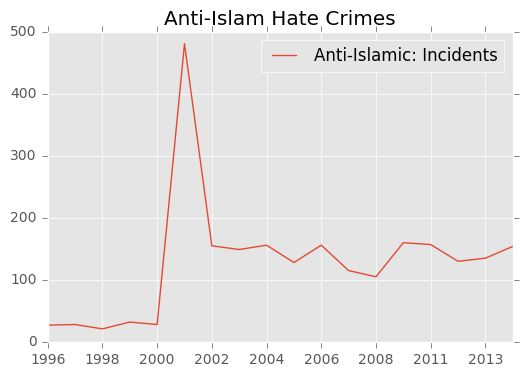

In [111]:
anti_islam = hc['Anti-Islamic: Incidents']
anti_islam.plot(kind='line',
                grid = True,
                title = 'Anti-Islam Hate Crimes',
                sharey = True,
                sharex = True,
                use_index = True,
                legend = True,
                fontsize = 10 
                )

### Answer:
The number of hate crime incidents against Muslims have fluctuated a lot over the years. The most striking number of incidents took place in 2011 as shown by the graph above. Before 2011, the maximum number of incidents were 32, and the minimum were 211. In 2011, the number of incidents were 481. After 2011, the max number of incidents were 156, and the minimum were 105. In recent years, the hate crimes against Muslims have started to rise again.From 1995 to 2014, the number of incidents changed as shown below:

In [94]:
print(anti_islam)

1996     27.0
1997     28.0
1998     21.0
1999     32.0
2000     28.0
2001    481.0
2002    155.0
2003    149.0
2004    156.0
2005    128.0
2006    156.0
2007    115.0
2008    105.0
2010    160.0
2011    157.0
2012    130.0
2013    135.0
2014    154.0
Name: Anti-Islamic: Incidents, dtype: float64


### Q : Did September-11 Terrorist Attack had an impact on the hate crimes against Muslims? If so, how much impact did September-11 Terrorist Attack had?

In [113]:
anti_islam_2011 = anti_islam[5]
anti_islam_2010 = anti_islam[4]
anti_islam_2012 = anti_islam[6]
percentage_change_2011 = (((anti_islam_2011 - anti_islam_2010)/anti_islam_2010)*100)
percentage_change_2012 = (((anti_islam_2012 - anti_islam_2011)/anti_islam_2011)*100)
print("Hate Crimes against Muslims growth in 2011 from 2010: ", percentage_change_2011, '%')
print("Hate Crimes against Muslims growth in 2010 from 2011: ", percentage_change_2012, '%')
anti_islam_before_2011 = anti_islam[:5].mean()

anti_islam_after_2011 = anti_islam[6:].mean()
print('Average hate crimes against Muslims before 2011: ', anti_islam_before_2011)
print('Average hate crimes against Muslims before 2011: ', anti_islam_after_2011)
avg = (((anti_islam_after_2011 - anti_islam_before_2011)/anti_islam_before_2011)*100)
print('Percentage increased in the average number of hate crimes against Muslims after 2011: ', avg)

Hate Crimes against Muslims growth in 2011 from 2010:  1617.85714286 %
Hate Crimes against Muslims growth in 2010 from 2011:  -67.7754677755 %
Average hate crimes against Muslims before 2011:  27.2
Average hate crimes against Muslims before 2011:  141.66666666666666
Percentage increased in the average number of hate crimes against Muslims after 2011:  420.8333333333333


#### Answer:
September-11 Terrorist Attack had a huge impact on the number of hate-crimes against Muslims. The incident took place in 2011, where there were 481 hate crimes against Muslims, as opposed to 28 in 2010. The number of hate crimes against Muslims increased by more than 16 times (1672%) in 2011 as compared to 2010. In the following year (2012), the number of hate crimes against Muslims decreased by almost 68%. The average number of hate crimes against Muslims were 27 before 2011, and after 2011, they have increased to an average of 142. The average number of hate crimes against Muslims increased by more than 4 times (421%).

### Q: How have the hate crimes against All religion changed in terms of number of incidents per year?

Average Number of Crimes before 2011 :  1411.8
Avearage Number of Crimes after 2011 :  1287.5
Avearage Number of Crimes after 2008 :  1139.8
Hate Crimes in 2011 :  1828.0


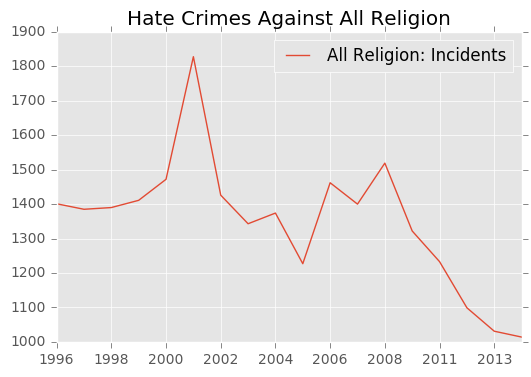

In [109]:
anti_religion = hc['All Religion: Incidents']
anti_religion.plot(kind='line',
title = 'Hate Crimes Against All Religion',
sharey = True,
sharex = True,
use_index = True,
legend = True)
anti_religion_2011 = anti_religion[5]
anti_religion_2010 = anti_religion[4]
anti_religion_2012 = anti_religion[6]
avg_before_2011 = anti_religion[:5].mean()
avg_after_2011 = anti_religion[6:].mean() 
avg_after_2008 = anti_religion[13:].mean()
print('Average Number of Crimes before 2011 : ', avg_before_2011)
print('Avearage Number of Crimes after 2011 : ', avg_after_2011)
print('Avearage Number of Crimes after 2008 : ', avg_after_2008)
print('Hate Crimes in 2011 : ', anti_religion_2011)

#### Answer:
As shown in the graph above, the number of hate_crimes against all religion fluctuated by going up and down in between 1996 and 2008, with a very high peak in 2011. Since 2008, the number has seen a consistent and steady decrease. It is the same year, Barrack Obama got elected as the President of the United States. The average number of crimes before 2011 were 1412, and after 2011 they were 1288. In 2011, there were 1828, and most of the stark increase can be contributed towards the stark increase in the hate crimes against Muslims.

### Q: What percentage of hate crimes motivated by religion identity target Muslims every year?


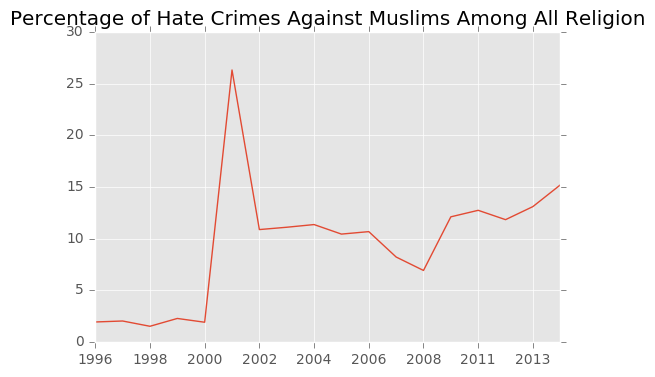

In [117]:
anti_muslim_percentage= (hc['Anti-Islamic: Incidents']/hc['All Religion: Incidents'])*100
anti_muslim_percentage.plot(kind = 'line',
                            title = 'Percentage of Hate Crimes Against Muslims Among All Religion',
                            sharey = True,
                            sharex = True,
                            use_index = True)

#### Answer
The ratio being discussed is shown above. Hate crimes targetting Muslims as a ratio of the hate-crimes motivated by religion has increased a lot in 2011 because of September-11 terrorist attack.Before, 2011, it was below 3% consistently, and in 2011 it went beyond 25%. After 2011, it never went down to its pre-2011 number. This also shows that the September-11 incident has increased the general sentiment against Muslims, and even after over a decade, the effect of September-11 on hate crimes against Muslims is clearly evident. Moreover, we can also see that the ratio has been rising in recent years showing that even though the number of hate-crimes against religions as a whole are decreasing, among those numbers, the ratio of attacks on Muslims in increaseing.

### Q: On average what percentages of attacks motivated by religion targetted Muslims, before and after the September-11 Terrorist Attack?

In [85]:
avg_before_2011 = something[:5].mean()
#not including 2011 in either average before or after 2011
avg_after_2011 = something[6:].mean()
perc_increase = (((avg_after_2011 - avg_before_2011)/avg_before_2011)*100)
print(avg_before_2011, avg_after_2011, perc_increase)
growth_list = []

1.9259431800868643 11.20777275833266 481.93683355846264


#### Answer
Mean of Percentage of Attacks on Muslims among All Hate Crimes motivated by religion, before 2011 : 1.9259431800868643 %  
    
Mean of Percentage of Attacks on Muslims among All Hate Crimes motivated by religion, after 2011 : 11.20777275833266 %  
    
Percentage Chaneg among the two means : 481.93683355846264 %

# Answer to Main Research Question:
#### Q:  Did September-11 terrorist attack have an impact on hate crimes against Muslims? How much and what impact did the incident have?

# Answer:
The number of hate crime incidents against Muslims have fluctuated a lot over the years. The most striking number of incidents took place in 2011 as shown by the graph above. Before 2011, the maximum number of incidents were 32, and the minimum were 211. In 2011, the number of incidents were 481. After 2011, the max number of incidents were 156, and the minimum were 105. In recent years, the hate crimes against Muslims have started to rise again.From 1995 to 2014, the number of incidents changed as shown above.
September-11 Terrorist Attack had a huge impact on the number of hate-crimes against Muslims. The incident took place in 2011, where there were 481 hate crimes against Muslims, as opposed to 28 in 2010. The number of hate crimes against Muslims increased by more than 16 times (1672%) in 2011 as compared to 2010. In the following year (2012), the number of hate crimes against Muslims decreased by almost 68%. The average number of hate crimes against Muslims were 27 before 2011, and after 2011, they have increased to an average of 142. The average number of hate crimes against Muslims increased by more than 4 times (421%).
As shown in the 3rd graph above, the number of hate_crimes against all religion fluctuated by going up and down in between 1996 and 2008, with a very high peak in 2011. Since 2008, the number has seen a consistent and steady decrease. It is the same year, Barrack Obama got elected as the President of the United States. The average number of crimes before 2011 were 1412, and after 2011 they were 1288. In 2011, there were 1828, and most of the stark increase can be contributed towards the stark increase in the hate crimes against Muslims.
Hate crimes targetting Muslims as a ratio of the hate-crimes motivated by religion increased a lot in 2011 because of September-11 terrorist attack.Before, 2011, it was below 3% consistently, and in 2011 it went beyond 25%. After 2011, it never went down to its pre-2011 number. This also shows that the September-11 incident has increased the general sentiment against Muslims, and even after over a decade, the effect of September-11 on hate crimes against Muslims is clearly evident. Moreover, we can also see that the ratio has been rising in recent years showing that even though the number of hate-crimes against religions as a whole are decreasing, among those numbers, the ratio of attacks on Muslims in increaseing.
The Mean of Percentage of Attacks on Muslims among All Hate Crimes motivated by religion, before 2011 is 1.9259431800868643 %. The Mean of Percentage of Attacks on Muslims among All Hate Crimes motivated by religion, after 2011 is 11.20777275833266 %. Percentage Chaneg among the two means is 481.93683355846264 %.

# Conclusion:
September-11 Terrorist attack had a pivotal impact on the number of hate crimes against Muslims, and the affect of the in
